In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.6 MB/s eta 0:00:00ta 0:00:01
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 3.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: t

In [ ]:
!pip install tensorflow --upgrade

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

2024-10-23 10:53:25.842290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 10:53:25.842359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 10:53:25.843768: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
classes = [i for i in os.listdir(fish_dir) if '.' not in i]                    
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [4]:
dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

In [5]:
data.head()

,path,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


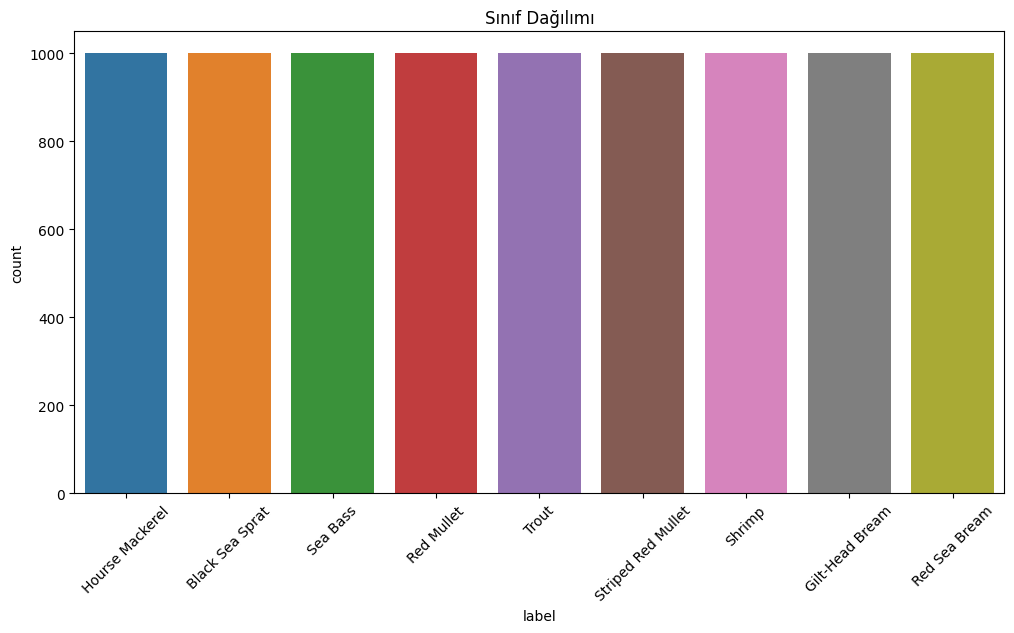

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıf dağılımını çubuk grafik olarak gösterme
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='label')
plt.title('Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_135/1454007349.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_data = data.groupby('label', group_keys=False).apply(lambda x: x.sample(1)).reset_index(drop=True)  # Her sınıftan bir örnek al


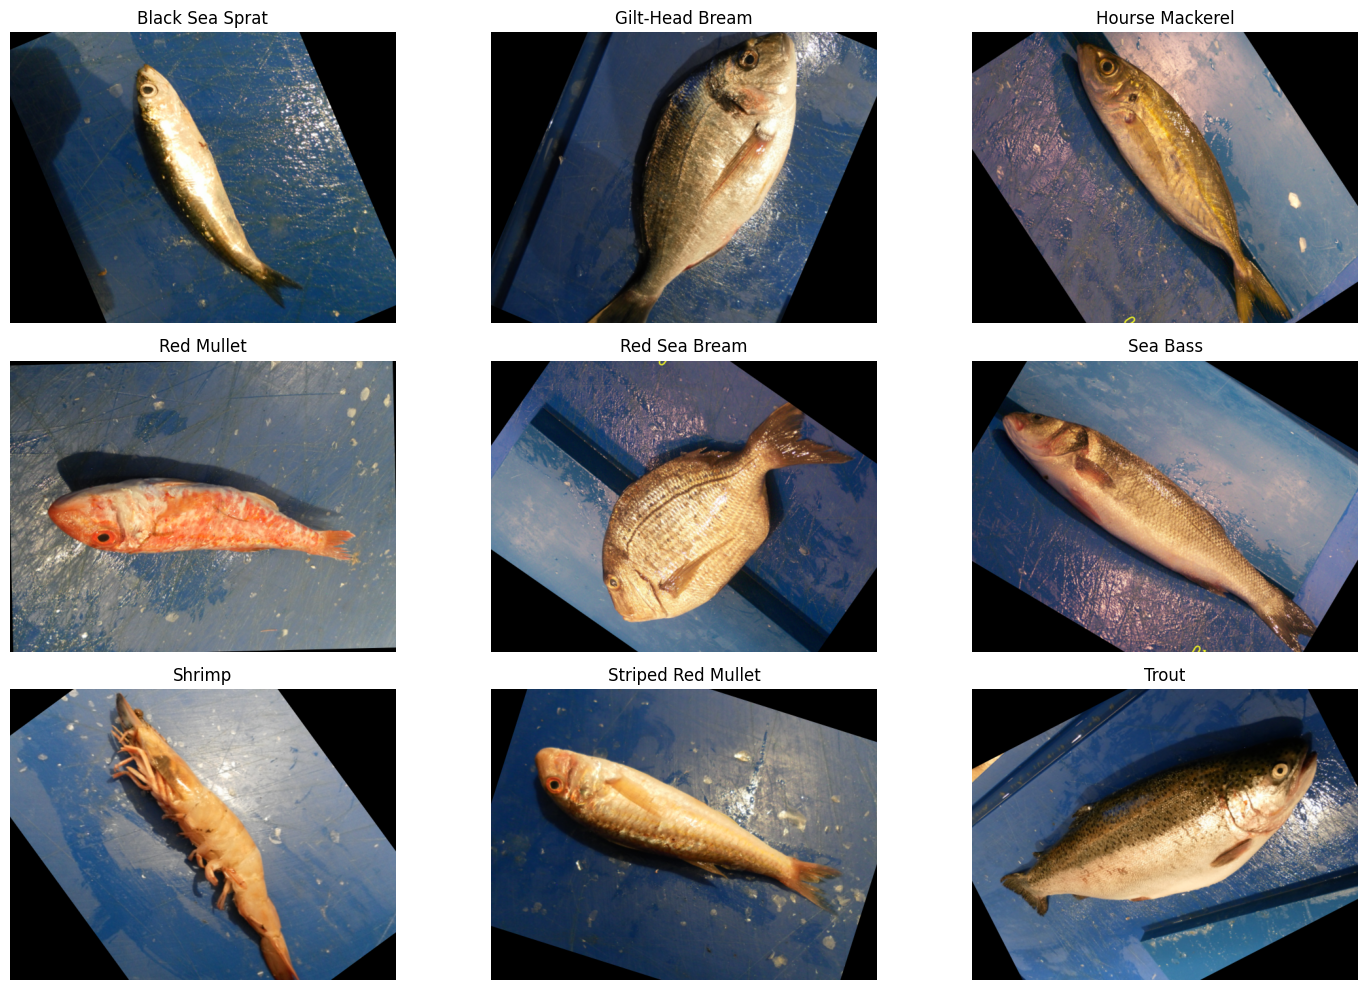

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(image_paths, titles, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
    for indx, ax in enumerate(axes.flat):
        img = mpimg.imread(image_paths[indx])
        ax.imshow(img)
        ax.set_title(titles[indx])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Her sınıftan birer örnek seçmek
sample_data = data.groupby('label', group_keys=False).apply(lambda x: x.sample(1)).reset_index(drop=True)  # Her sınıftan bir örnek al
sample_images = sample_data['path'].values  # Görüntü yollarını al
sample_labels = sample_data['label'].values  # Etiketleri al

# Görüntüleri ve etiketlerini görselleştir
plot_images(sample_images, sample_labels, 3, 3)


In [8]:
from PIL import Image

# Görüntü boyutlarını kontrol et
image_sizes = data['path'].apply(lambda x: Image.open(x).size)
print(image_sizes.value_counts())


path
(590, 445)    9000
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

# %80 eğitim, %20 test/validation
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# %15 test ve %5 validation olacak şekilde kalan veriyi bölmek
test_data, validation_data = train_test_split(temp_data, test_size=0.25, random_state=42, stratify=temp_data['label'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
# Eğitim, doğrulama ve test generatörleri
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=validation_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7200 validated image filenames belonging to 9 classes.
Found 450 validated image filenames belonging to 9 classes.
Found 1350 validated image filenames belonging to 9 classes.


In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

# ANN Modeli
model_ann = Sequential([
    Input(shape=(224, 224, 3)),  # Giriş Katmanı
    Flatten(),  # 3D görüntüyü 1D vektöre dönüştürme

    # Gizli Katmanlar
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Çıktı Katmanı
    Dense(len(train_generator.class_indices), activation='softmax')  # Sınıf sayısına göre çıktı
])

In [13]:
# Modelin derlenmesi
model_ann.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Modelin özeti
model_ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                       

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Checkpoint tanımlayın
checkpoint = ModelCheckpoint('en_iyi_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


# Modeli checkpoint ile eğitin
history_ann = model_ann.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint]
)

Epoch 1/50


I0000 00:00:1729680981.053439     188 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 [==============================] - 90s 383ms/step - loss: 1.9209 - accuracy: 0.3783 - val_loss: 1.4874 - val_accuracy: 0.5822
Epoch 2/50
225/225 [==============================] - 89s 394ms/step - loss: 1.2465 - accuracy: 0.5619 - val_loss: 0.7356 - val_accuracy: 0.7333
Epoch 3/50
225/225 [==============================] - 81s 361ms/step - loss: 0.8968 - accuracy: 0.6799 - val_loss: 0.9084 - val_accuracy: 0.7200
Epoch 4/50
225/225 [==============================] - 91s 407ms/step - loss: 0.7218 - accuracy: 0.7422 - val_loss: 0.6701 - val_accuracy: 0.7644
Epoch 5/50
225/225 [==============================] - 82s 364ms/step - loss: 0.5882 - accuracy: 0.7899 - val_loss: 0.8942 - val_accuracy: 0.7311
Epoch 6/50
225/225 [==============================] - 85s 377ms/step - loss: 0.5213 - accuracy: 0.8200 - val_loss: 1.0472 - val_accuracy: 0.6578
Epoch 7/50
225/225 [==============================] - 83s 369ms/step - loss: 0.4789 - accuracy: 0.8328 - val_loss: 0.7422 - val_accuracy: 0.7

In [20]:
# Modeli kaydet
model_ann.save('benim_modelim.h5')  # Modeli HDF5 formatında kaydeder


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


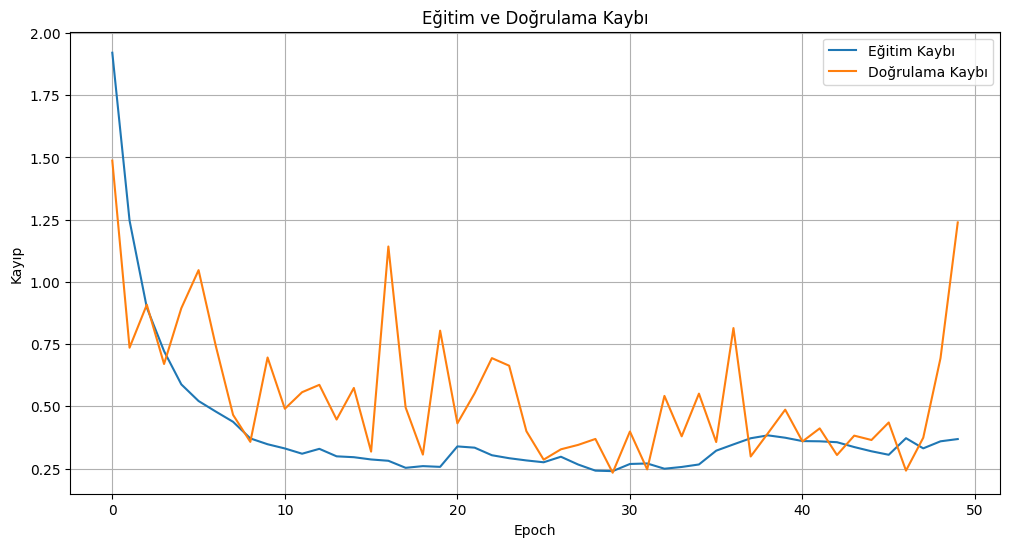

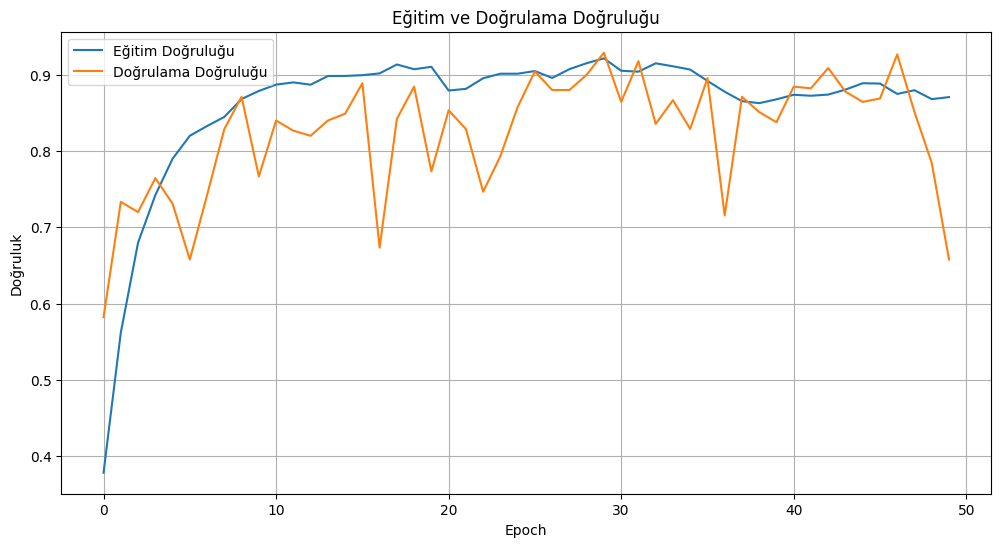

In [16]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını çizdirme
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['loss'], label='Eğitim Kaybı')
plt.plot(history_ann.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.grid(True)
plt.show()

# Eğitim ve doğrulama doğruluğunu çizdirme
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_ann.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.grid(True)
plt.show()


43/43 [==============================] - 16s 360ms/step


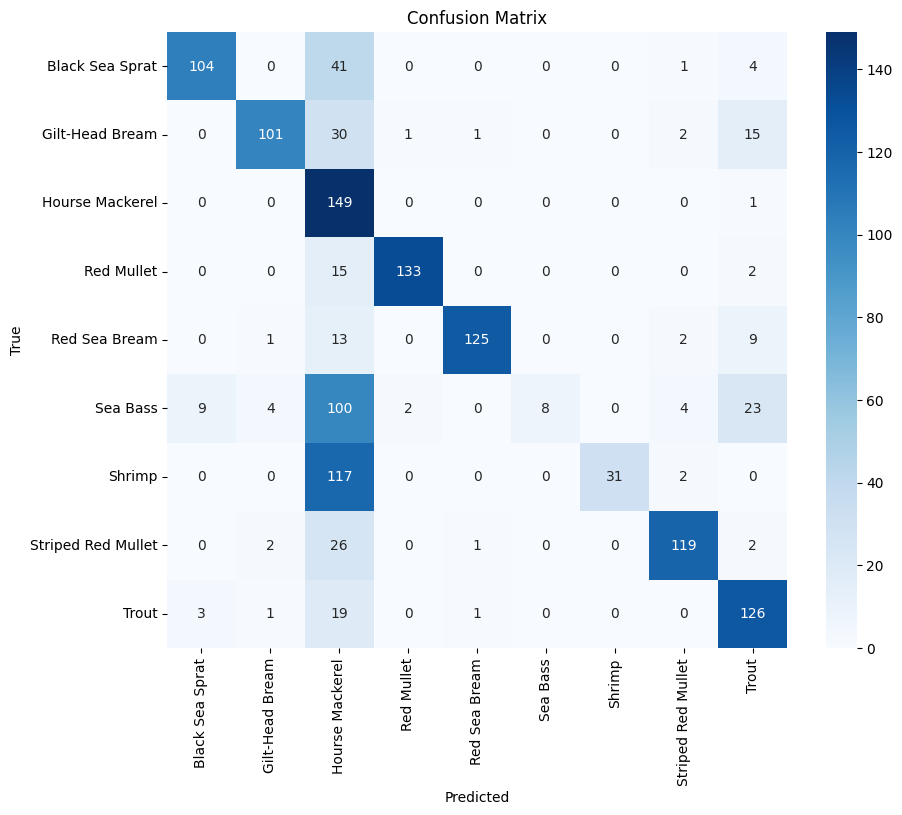

Classification Report:
                    precision    recall  f1-score   support

   Black Sea Sprat       0.90      0.69      0.78       150
   Gilt-Head Bream       0.93      0.67      0.78       150
   Hourse Mackerel       0.29      0.99      0.45       150
        Red Mullet       0.98      0.89      0.93       150
     Red Sea Bream       0.98      0.83      0.90       150
          Sea Bass       1.00      0.05      0.10       150
            Shrimp       1.00      0.21      0.34       150
Striped Red Mullet       0.92      0.79      0.85       150
             Trout       0.69      0.84      0.76       150

          accuracy                           0.66      1350
         macro avg       0.85      0.66      0.66      1350
      weighted avg       0.85      0.66      0.66      1350



In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Gerçek sınıf etiketlerini ve modelin tahminlerini alın
true_classes = test_generator.classes  # Test verisinin gerçek sınıfları
pred_probs = model_ann.predict(test_generator)  # Modelin tahmin olasılıkları
pred_classes = np.argmax(pred_probs, axis=1)  # En yüksek olasılığa sahip sınıf

# Sınıf isimlerinizi buraya ekleyin
class_labels = list(test_generator.class_indices.keys())

# Karışıklık Matrisi
conf_matrix = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print('Classification Report:')
print(report)


In [23]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(224, 224, 3)))
    model.add(Flatten())

    # Dense katmanlarının sayısını optimize ediyoruz
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=64,
                                     max_value=1024,
                                     step=128),
                        activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_' + str(i),
                                   min_value=0.1,
                                   max_value=0.5,
                                   step=0.1)))

    # Çıktı katmanı
    model.add(Dense(len(train_generator.class_indices), activation='softmax'))

    # Optimizer'ı optimize etme
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Keras Tuner kullanarak optimizasyon yapıyoruz
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Tuner'ı başlat
tuner.search(train_generator, epochs=50, validation_data=validation_generator)

# En iyi hiperparametreleri al ve en iyi modeli oluştur
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)


Trial 24 Complete [00h 13m 21s]
val_accuracy: 0.7644444704055786

Best val_accuracy So Far: 0.8177777528762817
Total elapsed time: 01h 36m 14s


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul] name: 

In [24]:
model.save_weights('model_weights.h5')


NameError: name 'model' is not defined